# Linear Regression Fatalities vs Injuries

### Contents

#### 1. Importing libraries and data
#### 2. Data prep for regression analysis
#### 3. Regression analysis

### 1.0 Import Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
%matplotlib inline

In [3]:
# Define path
path = r'C:\Users\Owner\Documents\Career Foundry\Gun Violence'

In [4]:
# Import data
df = pd.read_csv(os.path.join(path, '02 Data', '02 02 Prepared Data', 'gun_violence_clean_addition.csv'))

In [5]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'incident_id', 'date', 'state',
       'city_or_county', 'n_killed', 'n_injured', 'congressional_district',
       'incident_characteristics', 'latitude', 'longitude', 'n_guns_involved',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_status', 'participant_type', 'state_house_district',
       'state_senate_district', 'date_int', 'Gun Usage', 'region'],
      dtype='object')

In [8]:
df = df.drop('Unnamed: 0.1', axis=1)

In [9]:
df = df.drop('Unnamed: 0', axis=1)

In [10]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'n_killed',
       'n_injured', 'congressional_district', 'incident_characteristics',
       'latitude', 'longitude', 'n_guns_involved', 'participant_age',
       'participant_age_group', 'participant_gender', 'participant_status',
       'participant_type', 'state_house_district', 'state_senate_district',
       'date_int', 'Gun Usage', 'region'],
      dtype='object')

### 2.0 Data Prep for Regression

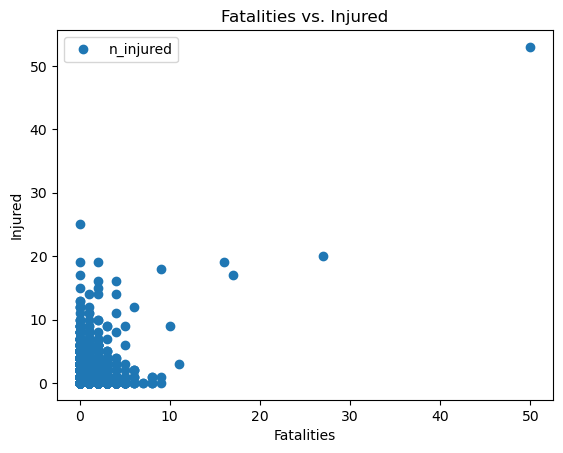

In [11]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'n_killed', y='n_injured',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Fatalities vs. Injured')  
plt.xlabel('Fatalities')  
plt.ylabel('Injured')  
plt.show()

Hypothesis: As the number of injuries occur, the number of fatalies from gun incidents decrease.

In [13]:
# Reshape the variables into NumPy arrays and put them into separate objects.
X = df['n_killed'].values.reshape(-1,1)
y = df['n_injured'].values.reshape(-1,1)

In [14]:
X

array([[0],
       [1],
       [1],
       ...,
       [0],
       [1],
       [2]], dtype=int64)

In [15]:
y

array([[4],
       [3],
       [3],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [16]:
# Split data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### 3.0 Regression Analysis

#### 3.1 Fill Data set

In [17]:
# Create a regression object.
regression = LinearRegression()

In [18]:
# Fit the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [19]:
# Predict the values of y using X.
y_predicted = regression.predict(X_test)

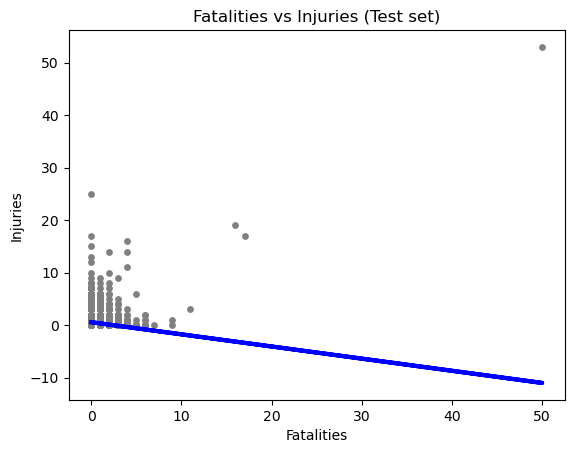

In [20]:
# Create a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='blue', linewidth =3)
plot_test.title('Fatalities vs Injuries (Test set)')
plot_test.xlabel('Fatalities')
plot_test.ylabel('Injuries')
plot_test.show()

The regression line for number of fatalities versus number of injuries follows the negative slope that I was expecting.  However, the coefficent is smaller than I expected for the data points.

In [21]:
# Create objects that contain the model summary statistics.
rmse_test = mean_squared_error(y_test, y_predicted)
r2_test = r2_score(y_test, y_predicted) 

In [22]:
# Print the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_test)
print('R2 score: ', r2_test)

Slope: [[-0.23138944]]
Mean squared error:  0.5782445419147891
R2 score:  -0.01266649364821193


In [23]:
# Create a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,0.552702
1,1,-0.372856
2,1,0.552702
3,1,0.552702
4,0,0.552702
5,0,0.552702
6,1,0.552702
7,0,0.321313
8,0,0.552702
9,1,0.552702


In [24]:
y_predicted_train = regression.predict(X_train)

In [25]:
#Accuracy of trained model
rmse_train = mean_squared_error(y_train, y_predicted_train)
r2_train = r2_score(y_train, y_predicted_train)

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_train)
print('R2 score: ', r2_train)

Slope: [[-0.23138944]]
Mean squared error:  0.5026055107346404
R2 score:  0.0268298198851874


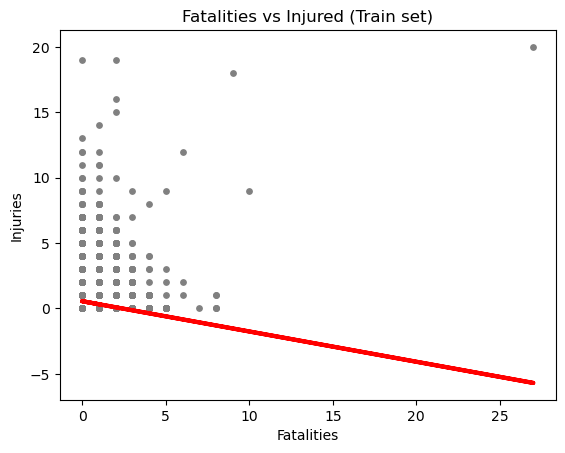

In [27]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='grey', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Fatalities vs Injured (Train set)')
plot_test.xlabel('Fatalities')
plot_test.ylabel('Injuries')
plot_test.show()

Based on the MSE of 0.5, the regression line is an accurate line to reflect the data.  However, the R2 score is almost 0, indicating that it is not a fit line for modeling the relationship between the number of fatalities due to gun incidents and number of individuals injured.  These two factors combined, along with comparing the predicted y values, leans to that this linear regression model is not an accurate predictor of the number of injuries based on fatalities.